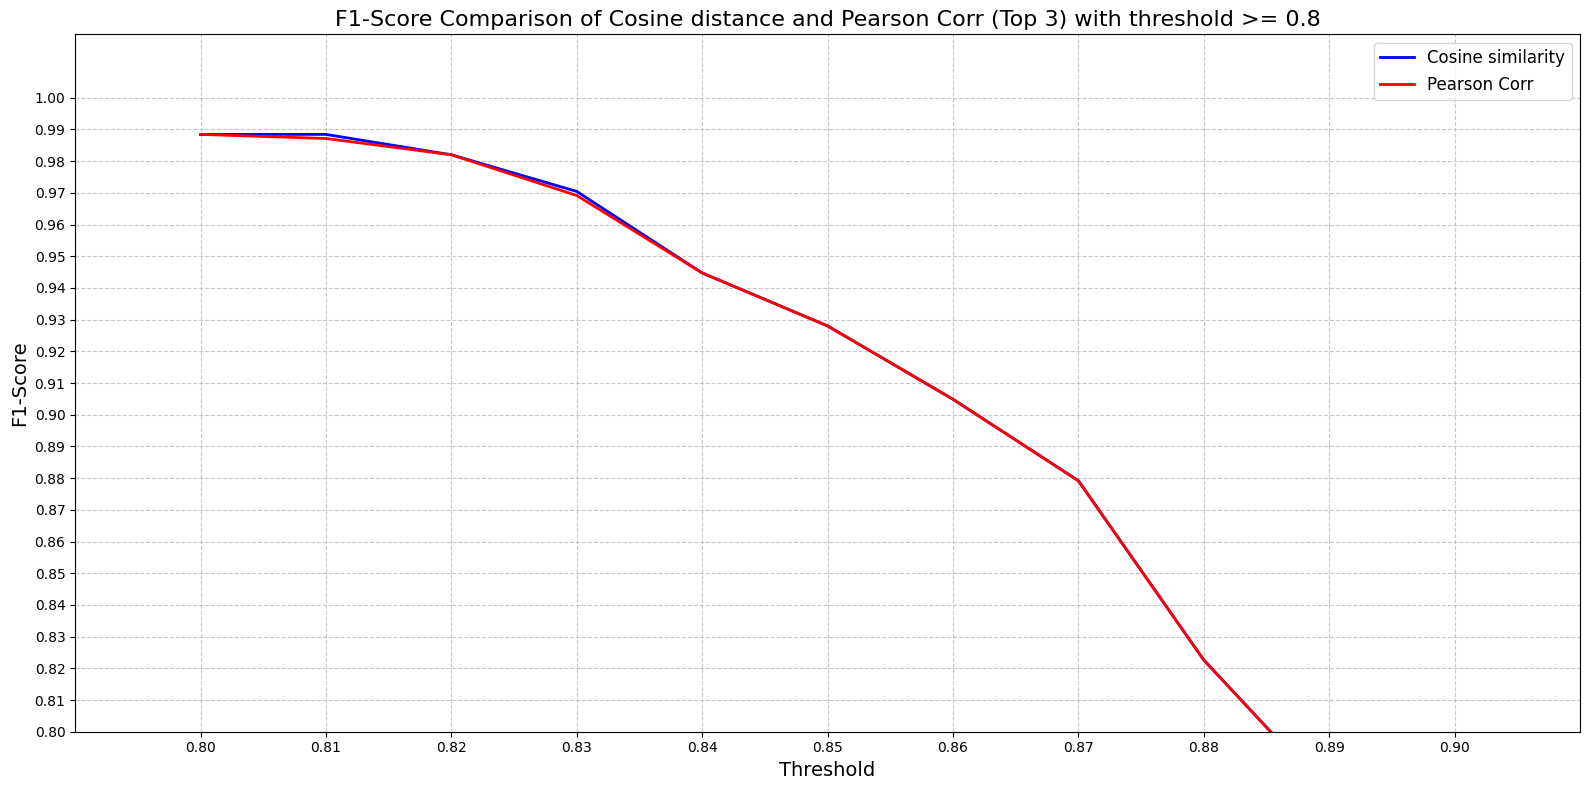

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ các file CSV
file_paths = {
    "Cosine similarity": "../experimental/top_3_Cosine similarity.csv",
    "Pearson Corr": "../experimental/top_3_Pearson Corr.csv",
}

dataframes = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Vẽ biểu đồ
plt.figure(figsize=(16, 8))

# Define colors for each method
colors = {
    "Cosine similarity": "blue",
    "Pearson Corr": "red",
}

# Plot f1-score line chart
for method, df in dataframes.items():
    # Filter out the data points with threshold >= 0.8
    filtered_df = df[df["Threshold"] >= 0.8]

    # Plot the line for this method
    plt.plot(
        filtered_df["Threshold"],
        filtered_df["F1-Score"],
        linestyle="-",
        linewidth=2,
        color=colors[method],
        label=f"{method}",
    )

# Set chart title and labels
plt.title(
    "F1-Score Comparison of Cosine distance and Pearson Corr (Top 3) with threshold >= 0.8",
    fontsize=16,
)
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)

# Set grid
plt.grid(True, linestyle="--", alpha=0.7)

# Set y-axis
plt.ylim(0.8, 1.02)
plt.yticks(np.arange(0.8, 1.01, 0.01))

# Set x-axis
plt.xlim(0.79, 0.91)
plt.xticks(np.arange(0.8, 0.91, 0.01))

# Add legend
plt.legend(fontsize=12)

# Improve layout
plt.tight_layout()

# Show the chart
plt.show()

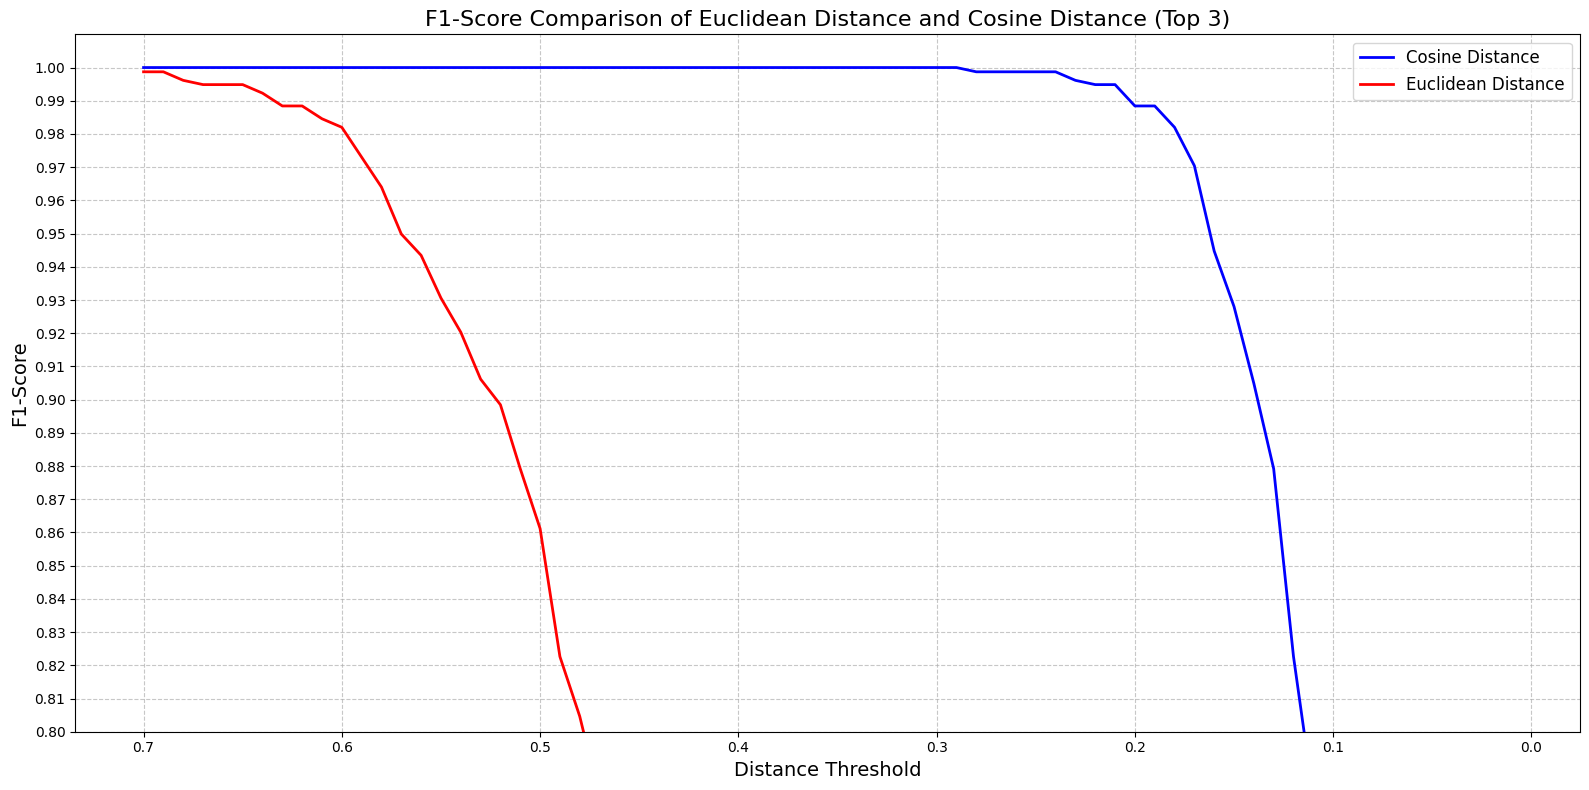

In [6]:
# Đọc dữ liệu từ các file CSV
cosine_df = pd.read_csv("../experimental/top_3_Cosine similarity.csv")
euclidean_df = pd.read_csv("../experimental/top_3_Euclidean distance.csv")

# Convert cosine similarity to cosine distance
cosine_distance_df = cosine_df.copy()
cosine_distance_df["Cosine Distance"] = 1 - cosine_distance_df["Threshold"]
cosine_distance_df["Original Threshold"] = cosine_distance_df[
    "Threshold"
]  # Keep original threshold

# Create a line chart comparing Cosine distance and Euclidean Distance
plt.figure(figsize=(16, 8))

# Plot F1-Score vs Cosine Distance
plt.plot(
    cosine_distance_df["Cosine Distance"],
    cosine_distance_df["F1-Score"],
    linestyle="-",
    linewidth=2,
    color="blue",
    label="Cosine Distance",
)

# Plot F1-Score vs Euclidean Distance
plt.plot(
    euclidean_df["Threshold"],
    euclidean_df["F1-Score"],
    linestyle="-",
    linewidth=2,
    color="red",
    label="Euclidean Distance",
)

# Set chart title and labels
plt.title(
    "F1-Score Comparison of Euclidean Distance and Cosine Distance (Top 3)", fontsize=16
)
plt.xlabel("Distance Threshold", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)

# Set grid
plt.grid(True, linestyle="--", alpha=0.7)

# Set y-axis
plt.ylim(0.8, 1.01)
plt.yticks(np.arange(0.8, 1.01, 0.01))

# Add legend
plt.legend(fontsize=12)

plt.gca().invert_xaxis()

# Improve layout
plt.tight_layout()

# Show the chart
plt.show()